__THE COMPETITION__ : Aerial Cactus Identification<br>
https://www.kaggle.com/c/aerial-cactus-identification/

# Downloading the Dataset

In [3]:
# Downloading the data 

! git clone https://github.com/n-s405/KACI-06-2019.git

fatal: destination path 'KACI-06-2019' already exists and is not an empty directory.


aerial-cactus-identification/


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Setting up path variables

In [0]:
from pathlib import Path

In [0]:
mv aerial-cactus-identification/ dataset/

In [44]:
ls dataset/

sample_submission.csv*  test/  train/  train.csv*


# The Secret Sauce

## Preliminary Data Exploration

Data made into a bunch called data

In [0]:
path = Path('dataset')

In [50]:
path.ls()

[PosixPath('dataset/test'),
 PosixPath('dataset/sample_submission.csv'),
 PosixPath('dataset/.DS_Store'),
 PosixPath('dataset/train'),
 PosixPath('dataset/train.csv')]

In [0]:
path_img = path/'train'

In [0]:
path_labels = path/'train.csv'

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
tfms = get_transforms(do_flip=False)

In [0]:
data = ImageDataBunch.from_csv(path , folder = 'train', ds_tfms=tfms, size=24 , csv_labels='train.csv');

In [65]:
data

ImageDataBunch;

Train: LabelList (14000 items)
x: ImageList
Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24)
y: CategoryList
1,1,1,1,1
Path: dataset;

Valid: LabelList (3500 items)
x: ImageList
Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24)
y: CategoryList
0,0,1,1,1
Path: dataset;

Test: None

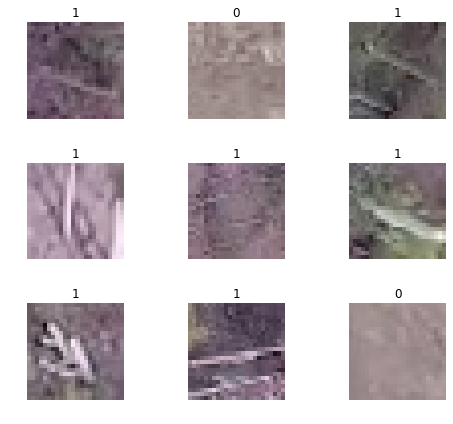

In [66]:
data.show_batch(rows=3, figsize=(7,6))

In [67]:
print(data.classes)

[0, 1]


In [68]:
len(data.classes),data.c

(2, 2)

## Resnet34

In [69]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 68821092.38it/s]


In [78]:
learn.fit_one_cycle(9)

epoch,train_loss,valid_loss,error_rate,time
0,0.120310,0.089978,0.030571,00:22
1,0.118170,0.093086,0.034571,00:23
2,0.122073,0.072083,0.025429,00:23
3,0.102054,0.065021,0.023143,00:23
4,0.074538,0.052872,0.018571,00:23
5,0.076927,0.047419,0.019714,00:23
6,0.068360,0.045759,0.014571,00:23
7,0.069568,0.045307,0.016000,00:23
8,0.066710,0.041853,0.013429,00:23


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)


In [0]:
losses,idxs = interp.top_losses()


In [82]:
len(data.valid_ds)==len(losses)==len(idxs)


True

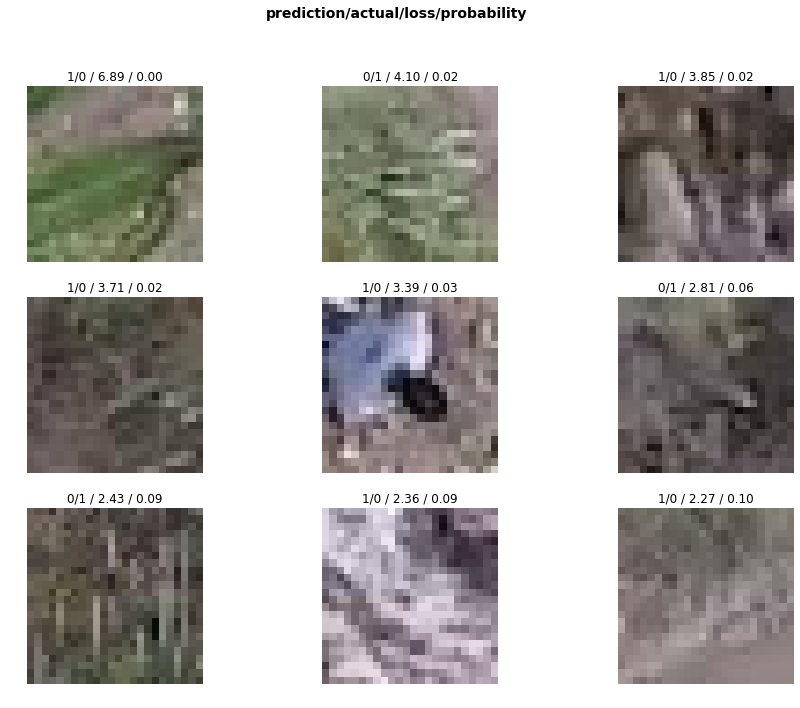

In [83]:
interp.plot_top_losses(9, figsize=(15,11))


In [84]:
doc(interp.plot_top_losses)


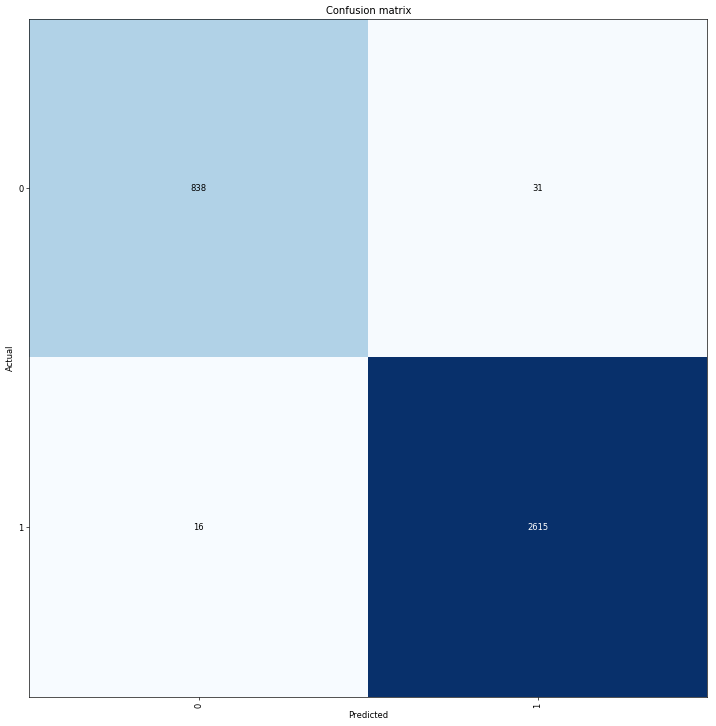

In [85]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
